<h1 style="color:rgb(0,120,170)">Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1: Formula for Maximum Likelihood of Poisson Distribution</h2>

Compute the Maximum Likelihood Estimator for the parameter $\lambda$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes

$$
\prod_{i=1}^{n} \mathcal{P}\left( x_{i}; \lambda \right) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you first take the logarithm of the density function.

<h3 style="color:rgb(210,90,80)">Calculation (25 points):</h3>

Your calculation here.

Now we take its log and rewrite is as below

$$ ln\bigg[\prod_{i=1}^{n} \mathcal{P}\left( x_{i}; \lambda \right) \bigg] = ln\bigg[\sum_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda} \bigg] $$

$$ ln\bigg[\prod_{i=1}^{n} \mathcal{P}\left( x_{i}; \lambda \right) \bigg] =  \sum_{i=1}^{n} \big[ln(e^{-\lambda}) - ln(x_i!)+ ln(\lambda^{x_i}) \big]$$

$$ ln\bigg[\prod_{i=1}^{n} \mathcal{P}\left( x_{i}; \lambda \right) \bigg] =  \sum_{i=1}^{n} \big[-\lambda - ln(x_i!)+ x_iln(\lambda) \big] $$

$$ ln\bigg[\prod_{i=1}^{n} \mathcal{P}\left( x_{i}; \lambda \right) \bigg] = -n\lambda - \sum_{i=1}^{n} ln(x_i!) +ln(\lambda) \sum_{i=1}^{n}x_i $$

And taking a partial differentiate w.r.t to $\lambda $ it and then set the differentiated equation to zero

$$\frac{\partial}{\partial \lambda}( -n\lambda - \sum_{i=1}^{n} ln(x_i!) +ln(\lambda) \sum_{i=1}^{n}x_i) =0 $$

$$ -n + \frac{1}{\lambda} \sum_{i=1}^{n}x_i =0 $$

$$ \lambda = \frac{1}{n}\sum_{i=1}^{n}x_i $$

<h2 style="color:rgb(0,120,170)">Task 2: Implementation of previous task</h2>

Plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(0, 0.5, 1.0, ...).$ 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [2]:
X = data_df.values

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


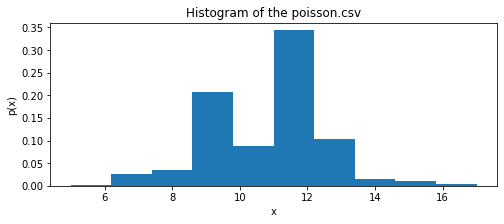

In [3]:
plt.figure(figsize=(8,3))
f = plt.hist(data_df.T,density=len(data_df))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of the poisson.csv');
plt.show()

**Log Likelihood:**

In [4]:
import math

def loglikelihood(x, lam):
    if lam==0:
        return -1
    l=0 
    for xi in x:
        l+=xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return l

In [5]:
#test the function
lam_set = np.linspace(1,50,100)

np.set_printoptions(precision=4)
print("Log-likelihood {}".format(loglikelihood(X,lam_set[0])))
print("Log-likelihood {}".format(loglikelihood(X,lam_set[10])))
print("Log-likelihood {}".format(loglikelihood(X,lam_set[20])))
print("Log-likelihood {}".format(loglikelihood(X,lam_set[90])))

Log-likelihood [-17657.3751]
Log-likelihood [-3709.1729]
Log-likelihood [-2243.6278]
Log-likelihood [-21735.951]


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Implement the estimator_formula function

<h3 style="color:rgb(210,90,80)">Code (5 points):</h3>

In [6]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""
    
##############################
# Begin your code
    count = 0
    total = 0
    for i in X:
        total += i
        count +=1
    lam_max_formula = total/count
    
# End your code
##############################
    
    return lam_max_formula

In [7]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) =',lam_max_formula)
print('Log-Likelihood at lambda-hat =',loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) = [10.597]
Log-Likelihood at lambda-hat = [-2239.4049]


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Implement the estimator_argmax function

<h3 style="color:rgb(210,90,80)">Code (5 points):</h3>

In [8]:
def estimator_argmax(X, lam_set):
    loglikelih = [loglikelihood(X,lami) for lami in lam_set]

##############################
# Begin your code
    
    lam_list = [estimator_formula(x) for x in X]
    lam_max = np.max(lam_list)
    

# End your code
##############################

    ln_min = np.min(loglikelih)
    ln_max = np.max(loglikelih)
    
    return loglikelih, ln_min, ln_max, lam_max

In [9]:
lam_set = np.arange(1,50,0.5) # start, end, stepsize
loglikelih, ln_min, ln_max, lam_max = estimator_argmax(X, lam_set)
print('Likelihood is maximal at lambda (argmax) =',lam_max)

Likelihood is maximal at lambda (argmax) = 17.0


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Implement the loglikelih function over lam_set
* mark the maximum in the plot (estimator_formula, estimator_argmax)

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [10]:
##############################
# Begin your code
def loglikeli_lam_set (X,lam_set):
    lam_list = []
    
    for element in lam_set:
        temp_lam = loglikelihood(X,element)
        lam_list.append(temp_lam)
    
    return lam_list

# End your code
##############################

In [11]:
loglikeli_set = loglikeli_lam_set(X,lam_set)

In [12]:
loglikeli_set_np = np.array(loglikeli_set)

In [13]:
lam_set_np = np.array(lam_set)

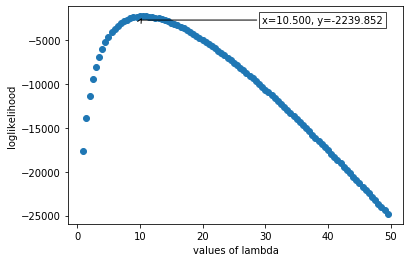

In [14]:
fig, ax = plt.subplots()
ax.plot(lam_set_np,loglikeli_set_np, 'o')

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(lam_set_np,loglikeli_set_np)
plt.xlabel("values of lambda")
plt.ylabel("loglikelihood")
plt.show()

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Explain and discuss the result in your own words. Where is the maximum?

<h3 style="color:rgb(208,90,80)">Question (5 points)</h3>

According to the plot of this experiment, the maximum value of loglikelihood has -2239.852 at 10.500 for the value of lambda. As Poisson Distribution, it means that the number of occurrences between 10 and 11 is the most expected frequent number in the dataset.